#**ARCHISHA SINHA**
#**R054**
##Domain: Intelligent Systems- 2
##Topic: Application of Fuzzy logic

####**Aim**:
To implement different applications of fuzzy logic and inference system in AI..


Fuzzy Logic:

Fuzzy Logic is an approach to variable processing that allows for multiple possible truth values to be processed through the same variable. Fuzzy Logic (FL) is a method of reasoning that resembles human reasoning. This approach is similar to how humans perform decision making. And it involves all intermediate possibilities between YES and NO.

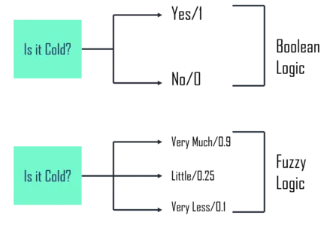

Fuzzy Logic Architecture



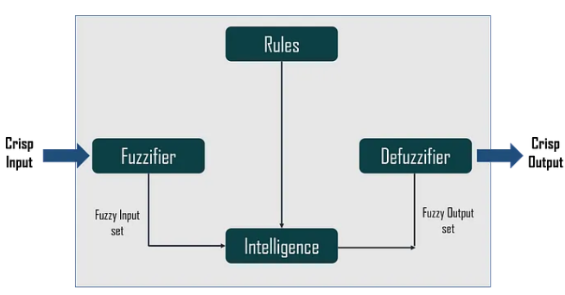

Rules — It contains all the rules and the if-then conditions offered by the experts to control the decision-making system. The recent update in the fuzzy theory provides different effective methods for the design and tuning of fuzzy controllers. Usually, these developments reduce the number of fuzzy rules.
Fuzzification — This step converts inputs or the crisp numbers into fuzzy sets. You can measure the crisp inputs by sensors and pass them into the control system for further processing. It splits the input signal into five steps such as-

1. Inference Engine — It determines the degree of match between fuzzy input and the rules. According to the input field, it will decide the rules that are to be fired. Combining the fired rules, form the control actions.
2. Defuzzification — The Defuzzification process converts the fuzzy sets into a crisp value. There are different types of techniques available, and you need to select the best-suited one with an expert system.

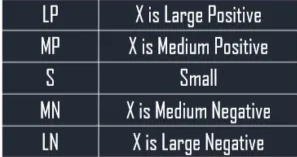

####Membership Function
The membership function is a graph that defines how each point in the input space is mapped to membership value between 0 and 1. It allows you to quantify linguistic terms and represent a fuzzy set graphically. A membership function for a fuzzy set A on the universe of discourse X is defined as μA:X → [0,1]
It quantifies the degree of membership of the element in X to the fuzzy set A.
x-axis represents the universe of discourse.
y-axis represents the degrees of membership in the [0, 1] interval.
There can be multiple membership functions applicable to fuzzify a numerical value. Simple membership functions are used as the complex functions do not add precision in the output. The membership functions for LP, MP, S, MN, and LN are:


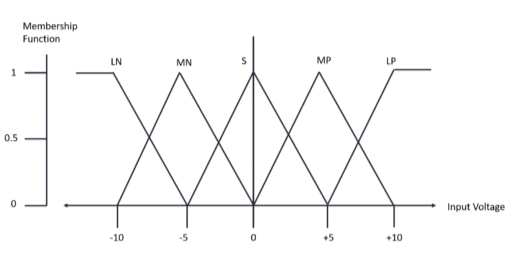

##TASK 1

Implement the following fuzzy set in python for automatic temperature control for Air Condition. The control system should give desired output temperature given any value from room temperature set

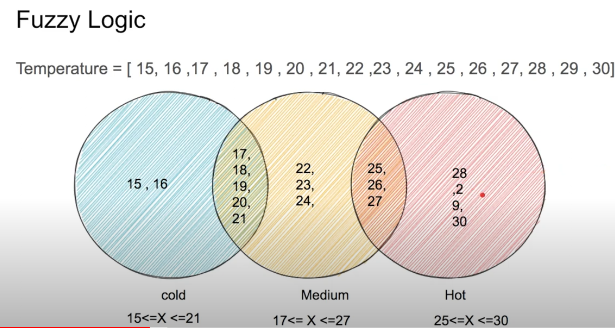

Steps:
1. Import required library(skfuzzy) from skfuzzy import control
2. Define two list/array:Temperature and AC_temperature
3. Define antecedent and consequent for both arrays
4. Define membership function for Temperature
5. Define the rules
6. Apply the rules on a control system
7. Use Compute so that the control system will give out required output as per the input given.


In [ ]:
pip install scikit-fuzzy

In [ ]:
import skfuzzy
import numpy as np
from skfuzzy import control as ctrl

In [ ]:
# create room temp list
temperature= np.arange(15, 31)
temperature

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
#create antecedent as temperature (antecedent is input and my input is temperature )
temp= ctrl.Antecedent(temperature, 'temp')
temp

Antecedent: temp

In [ ]:
#define ac temperature
ac_temperature= np.arange(15,24)
ac_temperature

array([15, 16, 17, 18, 19, 20, 21, 22, 23])

In [ ]:
#consequent is the AC-temprature (o/p is called consequent )
ac_temp=ctrl.Consequent(ac_temperature, 'ac_temp')
ac_temp

Consequent: ac_temp

In [ ]:
temp.automf(3)    #autimated membership fn (helps decide how many member is to be decided)

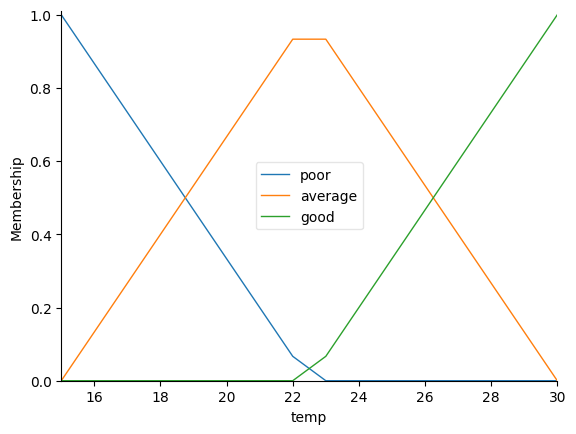

In [ ]:
temp.view()         #poor-cold  #avg-medium     #good-hot

In [ ]:
temp.automf(3,names=['Cold', 'Mild', 'Hot'])    #autimated membership fn (helps decide how many member is to be decided)

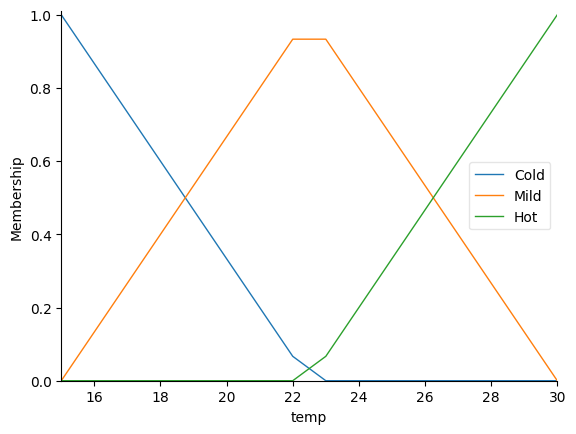

In [ ]:
temp.view()         #poor-cold  #avg-medium     #good-hot

In [ ]:
ac_temp.automf(3,names=['Cold', 'Mild', 'Hot'])    #autimated membership fn (helps decide how many member is to be decided)

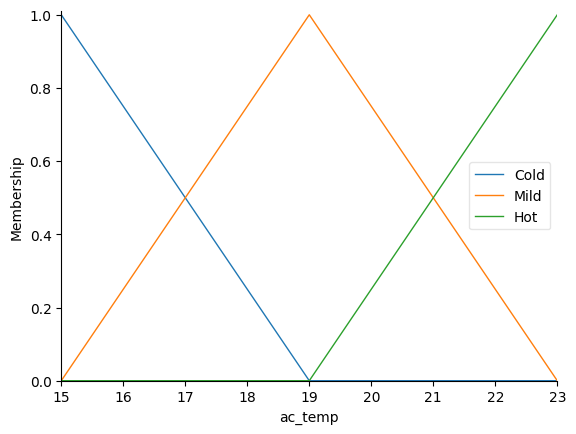

In [ ]:
ac_temp.view()         #poor-cold  #avg-medium     #good-hot

In [ ]:
rule1=ctrl.Rule(temp['Cold'], ac_temp['Hot'])
rule2=ctrl.Rule(temp['Mild'], ac_temp['Mild'])
rule3=ctrl.Rule(temp['Hot'], ac_temp['Cold'])

In [ ]:
temperature_control= ctrl.ControlSystem([rule1,rule2,rule3])

In [ ]:
detect_temp=ctrl.ControlSystemSimulation(temperature_control)

In [ ]:
detect_temp.input['temp']=16

In [ ]:
detect_temp.compute()

In [ ]:
detect_temp.output['ac_temp']

20.695957820738133

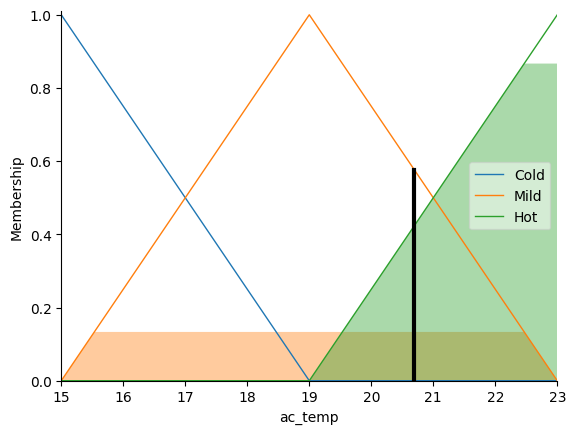

In [ ]:
ac_temp.view(sim=detect_temp)

##Task 2

Implement Grade system

1. Open your last semester result
2. Consider the marks you have got as a set
3. Give the rules of grades as per the range mentioned
4. Your Code should be able to grade any given marks


In [ ]:
marks=np.arange(1,101)
marks


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
grd=ctrl.Antecedent(marks,'grd')
grd

Antecedent: grd

In [ ]:
gpa=np.arange(1,5)
gpa
gpa=ctrl.Consequent(gpa, 'gpa')
gpa

Consequent: gpa

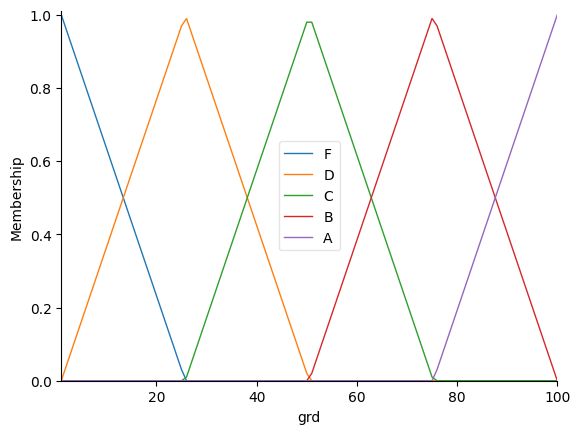

In [ ]:
grd.automf(5,names=['F','D','C','B','A'])
grd.view()

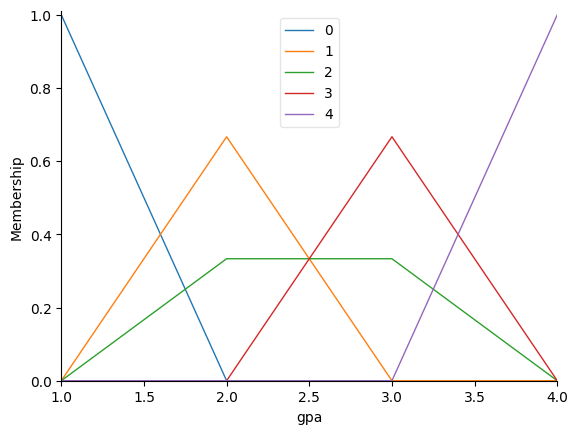

In [ ]:
gpa.automf(5,names=['0','1','2','3','4'])
gpa.view()

In [ ]:
rule1=ctrl.Rule(grd['F'],gpa['0'])
rule2=ctrl.Rule(grd['D'],gpa['1'])
rule3=ctrl.Rule(grd['C'],gpa['2'])
rule4=ctrl.Rule(grd['B'],gpa['3'])
rule5=ctrl.Rule(grd['A'],gpa['4'])

In [ ]:
grading_GPA=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
calculate_GPA=ctrl.ControlSystemSimulation(grading_GPA)

In [ ]:
your_marks=int(input("Enter your Marks: "))
calculate_GPA.input['grd']=your_marks
calculate_GPA.compute()
calculate_GPA.output['gpa']


Enter your Marks: 75


2.9732801748966993

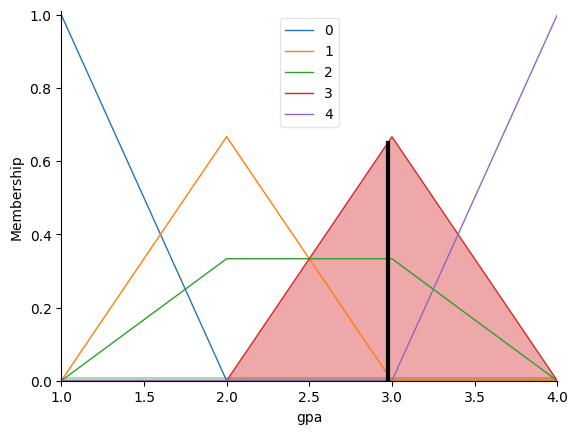

In [ ]:
gpa.view(sim=calculate_GPA)

Observation: A membership function in fuzzy logic defines the degree to which an element belongs to a particular fuzzy set. It assigns a membership value between 0 and 1, indicating the degree of membership, with 0 representing no membership and 1 indicating full membership.

Conclusion: Membership functions allow for a nuanced representation of uncertainty, enabling the modeling of imprecise or vague information. The choice of membership functions significantly influences the granularity and precision of fuzzy logic systems, impacting their ability to handle real-world uncertainties.